## Visualizing your data

#### Visualizing your data

In [1]:
# importing pandas
import pandas as pd

# importing sales dataset
avocado = pd.read_pickle("../datasets/avoplotto.pkl")
avocado.head()

,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56


#### Histograms

In [2]:
import matplotlib.pyplot as plt

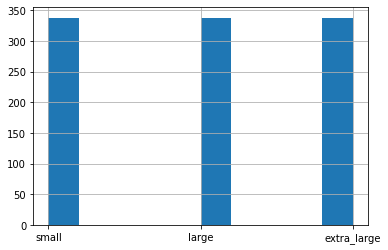

In [4]:
avocado["size"].hist()
plt.show()

#### Histograms

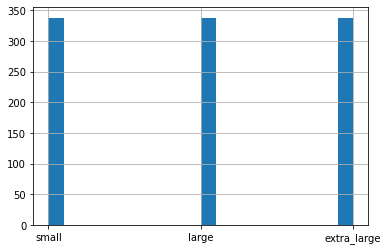

In [7]:
avocado["size"].hist(bins=20)
plt.show()

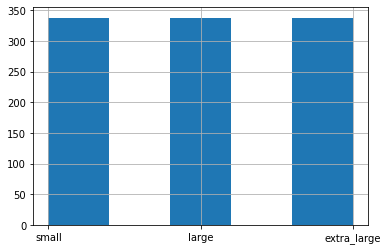

In [9]:
avocado["size"].hist(bins=5)
plt.show()

#### Bar plots

In [11]:
avg_price_by_size = avocado.groupby("size")["avg_price"].mean()
avg_price_by_size

size
extra_large    1.319024
large          1.319024
small          1.319024
Name: avg_price, dtype: float64

#### Bar plots

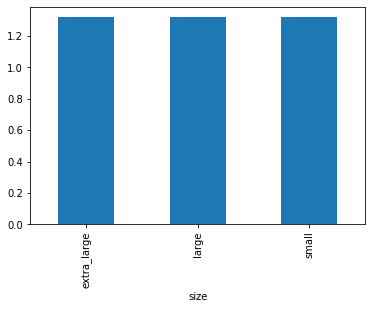

In [13]:
avg_price_by_size.plot(kind="bar")
plt.show()

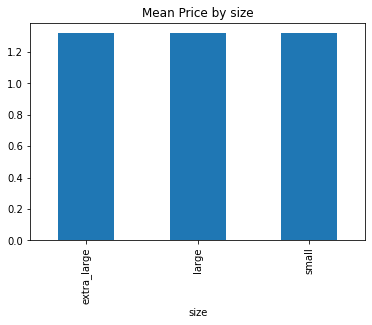

In [14]:
avg_price_by_size.plot(kind="bar", title="Mean Price by size")
plt.show()

#### Line plots

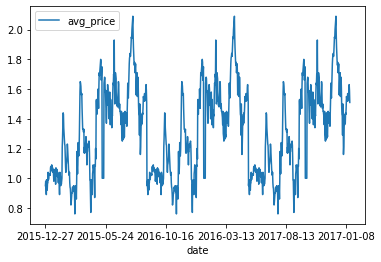

In [19]:
avocado.plot(x="date", y="avg_price", kind="line")
plt.show()

#### Rotating axis labels

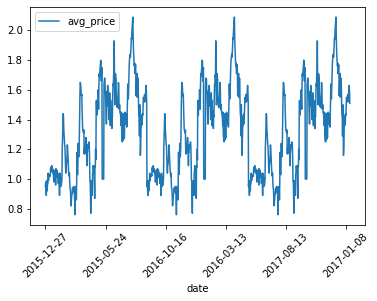

In [18]:
avocado.plot(x="date", y="avg_price", kind="line", rot=45)
plt.show()

#### Scatter plots

c:\users\admin\documents\github\crash course on python\venv\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


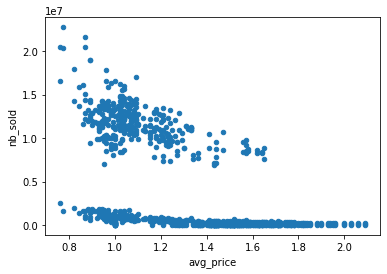

In [21]:
avocado.plot(x="avg_price", y="nb_sold", kind="scatter")
plt.show()

#### Layering plots

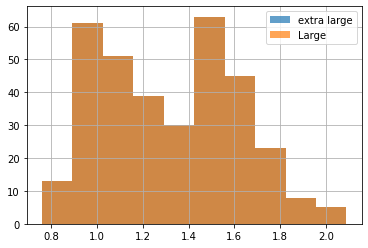

In [29]:
avocado[avocado["size"] == "extra_large"]["avg_price"].hist(alpha=0.7)
avocado[avocado["size"] == "large"]["avg_price"].hist(alpha=0.7)
plt.legend(["extra large", "Large"])
plt.show()

#### Multi-level indexes a.k.a hierarchical indexes

In [27]:
temp_ind3 = temp.set_index(["country", "city"])
temp_ind3

Unnamed: 0        date  avg_temp_c
country       city                                       
Côte D'Ivoire Abidjan           0  2000-01-01      27.293
              Abidjan           1  2000-02-01      27.685
              Abidjan           2  2000-03-01      29.061
              Abidjan           3  2000-04-01      28.162
              Abidjan           4  2000-05-01      27.547
...                           ...         ...         ...
China         Xian          16495  2013-05-01      18.979
              Xian          16496  2013-06-01      23.522
              Xian          16497  2013-07-01      25.251
              Xian          16498  2013-08-01      24.528
              Xian          16499  2013-09-01         NaN

[16500 rows x 3 columns]

In [28]:
temp_ind3.loc[["Germany", "China"]]

Unnamed: 0        date  avg_temp_c
country city                                      
Germany Berlin        1650  2000-01-01       1.324
        Berlin        1651  2000-02-01       4.718
        Berlin        1652  2000-03-01       5.806
        Berlin        1653  2000-04-01      11.805
        Berlin        1654  2000-05-01      16.376
...                    ...         ...         ...
China   Xian         16495  2013-05-01      18.979
        Xian         16496  2013-06-01      23.522
        Xian         16497  2013-07-01      25.251
        Xian         16498  2013-08-01      24.528
        Xian         16499  2013-09-01         NaN

[2805 rows x 3 columns]

#### Subset inner levels with a list of tuples

In [29]:
temp_ind3.loc[[("Germany", "Berlin"), ("China", "Xian")]]

Unnamed: 0        date  avg_temp_c
country city                                      
Germany Berlin        1650  2000-01-01       1.324
        Berlin        1651  2000-02-01       4.718
        Berlin        1652  2000-03-01       5.806
        Berlin        1653  2000-04-01      11.805
        Berlin        1654  2000-05-01      16.376
...                    ...         ...         ...
China   Xian         16495  2013-05-01      18.979
        Xian         16496  2013-06-01      23.522
        Xian         16497  2013-07-01      25.251
        Xian         16498  2013-08-01      24.528
        Xian         16499  2013-09-01         NaN

[330 rows x 3 columns]

#### Sorting by index values

In [30]:
temp_ind3.sort_index()

Unnamed: 0        date  avg_temp_c
country     city                                      
Afghanistan Kabul         7260  2000-01-01       3.326
            Kabul         7261  2000-02-01       3.454
            Kabul         7262  2000-03-01       9.612
            Kabul         7263  2000-04-01      17.925
            Kabul         7264  2000-05-01      24.658
...                        ...         ...         ...
Zimbabwe    Harare        5605  2013-05-01      18.298
            Harare        5606  2013-06-01      17.020
            Harare        5607  2013-07-01      16.299
            Harare        5608  2013-08-01      19.232
            Harare        5609  2013-09-01         NaN

[16500 rows x 3 columns]

#### Controlling sort_index

In [32]:
temp_ind3.sort_index(level=["country", "city"], ascending=[True, False])

Unnamed: 0        date  avg_temp_c
country     city                                      
Afghanistan Kabul         7260  2000-01-01       3.326
            Kabul         7261  2000-02-01       3.454
            Kabul         7262  2000-03-01       9.612
            Kabul         7263  2000-04-01      17.925
            Kabul         7264  2000-05-01      24.658
...                        ...         ...         ...
Zimbabwe    Harare        5605  2013-05-01      18.298
            Harare        5606  2013-06-01      17.020
            Harare        5607  2013-07-01      16.299
            Harare        5608  2013-08-01      19.232
            Harare        5609  2013-09-01         NaN

[16500 rows x 3 columns]

#### Now you have two problems
* Index values are just data
* Indexes violate "tidy data" principles
* You need to learn two syntaxes